# Case de Análise de Dados no Pandas!

Iremos usar o banco de dados [Online Retail.xlsx](https://archive.ics.uci.edu/ml/datasets/Online+Retail), disponível no [Repositório de Dados para Machine Learning da UCI](https://archive.ics.uci.edu/ml/index.php). Para efeitos didáticos, eu fiz uma transformação no banco de dados para incluir a coluna `region`, que contém o nome do país assim como do continente.

![title](https://raw.githubusercontent.com/amauri-ti/labdata/main/imgs/uci-logo.png)

### Importando as bibliotecas necessárias e o banco de dados

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = spark.read.csv("/FileStore/tables/retail.csv", header=True, sep=',')
df = df.toPandas()

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


In [0]:
display(dbutils.fs.ls('/FileStore/tables/'))

path,name,size,modificationTime
dbfs:/FileStore/tables/Companhia_MB.txt,Companhia_MB.txt,1710,1682345918000
dbfs:/FileStore/tables/StudentsPerformance.csv,StudentsPerformance.csv,72036,1682426830000
dbfs:/FileStore/tables/movie_data-1.csv,movie_data-1.csv,0,1682425504000
dbfs:/FileStore/tables/movie_data-2.csv,movie_data-2.csv,305803975,1682427317000
dbfs:/FileStore/tables/movie_data.csv,movie_data.csv,0,1682425465000
dbfs:/FileStore/tables/retail.csv,retail.csv,45571673,1682002943000


#### Significado das colunas:

* `invoice_no`: número do pedido
* `stock_code`: número único que caracteriza o item/produto (SKU)
* `description`: descrição/nome do produto
* `quantity`: quantidade do produto vendida
* `invoice_date`: data em que o pedido foi realizado
* `unit_price`: preço unitário
* `customer_id`: identificador único do cliente
* `region`: região de onde o cliente realizou a compra

# Operações básicas de dados no Pandas

## 1. Selecionando colunas

Existem 2 formas de selecionar colunas no Pandas: a primeira é usando o `parênteses` e a segunda usando o método `filter()`.

In [0]:
df[['stock_code', 'unit_price']]

,stock_code,unit_price
0,85123A,"2,55"
1,71053,"3,39"
2,84406B,"2,75"
3,84029G,"3,39"
4,84029E,"3,39"
...,...,...
541904,22613,"0,85"
541905,22899,"2,1"
541906,23254,"4,15"
541907,23255,"4,15"


In [0]:
df.filter(['stock_code', 'unit_price'])

,stock_code,unit_price
0,85123A,"2,55"
1,71053,"3,39"
2,84406B,"2,75"
3,84029G,"3,39"
4,84029E,"3,39"
...,...,...
541904,22613,"0,85"
541905,22899,"2,1"
541906,23254,"4,15"
541907,23255,"4,15"


In [0]:
df.filter(like='id')

,customer_id
0,17850
1,17850
2,17850
3,17850
4,17850
...,...
541904,12680
541905,12680
541906,12680
541907,12680


In [0]:
toy_df = pd.DataFrame({'pedido_id': [1, 1, 2, 3, 3], 
                       'produto_id': [251, 985, 390, 204, 985], 
                       'descricao': ['carro', 'boneca', 'celular', 'caderno', 'boneca'], 
                       'data_compra': ['2020-03-01', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-03'], 
                       'data_entrega': ['2020-03-02', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-04'], 
                       'valor_item': [25000, 30, 2000, 15, 30], 
                       'quantidade': [1, 1, 1, 2, 3]})
toy_df

,pedido_id,produto_id,descricao,data_compra,data_entrega,valor_item,quantidade
0,1,251,carro,2020-03-01,2020-03-02,25000,1
1,1,985,boneca,2020-03-01,2020-03-02,30,1
2,2,390,celular,2020-03-02,2020-03-03,2000,1
3,3,204,caderno,2020-03-03,2020-03-04,15,2
4,3,985,boneca,2020-03-03,2020-03-04,30,3


In [0]:
toy_df.shape

Out[24]: (5, 7)

In [0]:
toy_df.filter(like='data')

,data_compra,data_entrega
0,2020-03-01,2020-03-02
1,2020-03-01,2020-03-02
2,2020-03-02,2020-03-03
3,2020-03-03,2020-03-04
4,2020-03-03,2020-03-04


In [0]:
toy_df.filter(like='id')

,pedido_id,produto_id,quantidade
0,1,251,1
1,1,985,1
2,2,390,1
3,3,204,2
4,3,985,3


## 2. Filtros

Também existem duas formas de realizar filtros no Pandas: uma com `parênteses` e outra com o método `query()`.

In [0]:
df[df['invoice_no'] == '536368']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom


In [0]:
df.query('invoice_no == "536368"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom


#### Filtrando com duas condições

Condição `and`

In [0]:
df[(df['invoice_no'] == '536368') & (df['stock_code'] == '22960')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom


In [0]:
df.query('invoice_no == "536368" and stock_code == "22960"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom


Condição `or`

In [0]:
df[(df['invoice_no'] == '536368') | (df['stock_code'] == '22960')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
170,536385,22960,JAM MAKING SET WITH JARS,6,12/1/10 9:56,"4,25",17420,United Kingdom
...,...,...,...,...,...,...,...,...
539091,581433,22960,JAM MAKING SET WITH JARS,6,12/8/11 15:54,"4,25",14911,EIRE
539731,581439,22960,JAM MAKING SET WITH JARS,3,12/8/11 16:30,"8,29",None,United Kingdom
539954,581451,22960,JAM MAKING SET WITH JARS,6,12/8/11 17:57,"4,25",17144,United Kingdom
541049,581492,22960,JAM MAKING SET WITH JARS,2,12/9/11 10:03,"8,29",None,United Kingdom


In [0]:
df.query('invoice_no == "536368" or stock_code == "22960"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047,United Kingdom
170,536385,22960,JAM MAKING SET WITH JARS,6,12/1/10 9:56,"4,25",17420,United Kingdom
...,...,...,...,...,...,...,...,...
539091,581433,22960,JAM MAKING SET WITH JARS,6,12/8/11 15:54,"4,25",14911,EIRE
539731,581439,22960,JAM MAKING SET WITH JARS,3,12/8/11 16:30,"8,29",None,United Kingdom
539954,581451,22960,JAM MAKING SET WITH JARS,6,12/8/11 17:57,"4,25",17144,United Kingdom
541049,581492,22960,JAM MAKING SET WITH JARS,2,12/9/11 10:03,"8,29",None,United Kingdom


## 3. Criando novas colunas

Existem duas formas de criar colunas com o Pandas: uma com `parênteses` e outra usando o método `assign()`.

In [0]:
df['total_price'] = df['quantity'] + df['unit_price']

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.drop('total_price', axis=1, inplace=True)

In [0]:
df.assign(total_price = df['quantity'] + df['unit_price']).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


O método `assign()` não modifica a tabela inplace. O que o torna uma boa opção para validar a nova coluna criada antes de efetivamente adicioná-la na tabela.

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


Para salvar a coluna de fato, devemos atribuir a operação para uma tabela.

In [0]:
df = df.assign(total_price = df['quantity'] + df['unit_price'])

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.drop('total_price', axis=1, inplace=True)

## 4. Ordenando colunas

Aqui, existem apenas um método: `sort_values()`.

In [0]:
df.sort_values('invoice_date').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
50806,540558,21258,?,-29,1/10/11 10:04,0,None,United Kingdom
50807,C540559,21888,BINGO SET,-4,1/10/11 10:07,"3,75",None,EIRE
50808,540560,21589,None,-14,1/10/11 10:08,0,None,United Kingdom
50828,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/11 10:32,"0,85",13004,United Kingdom
50815,540561,21232,STRAWBERRY CERAMIC TRINKET BOX,12,1/10/11 10:32,"1,25",13004,United Kingdom


In [0]:
df.sort_values('invoice_date', ascending=False).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion
332571,566079,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,24,9/9/11 9:52,"0,85",17593,United Kingdom
332544,566079,23403,LETTER HOLDER HOME SWEET HOME,4,9/9/11 9:52,"3,75",17593,United Kingdom
332551,566079,22396,MAGNETS PACK OF 4 RETRO PHOTO,24,9/9/11 9:52,"0,39",17593,United Kingdom
332550,566079,22400,MAGNETS PACK OF 4 HOME SWEET HOME,24,9/9/11 9:52,"0,39",17593,United Kingdom
332549,566079,20838,FRENCH LATTICE CUSHION COVER,12,9/9/11 9:52,"0,85",17593,United Kingdom


## 5. Aggregações

No Pandas podemos criar agregações de duas formas: em uma coluna ou em grupos.

### Agregações em uma coluna

In [0]:
df['invoice_date'].min()

Out[44]: '1/10/11 10:04'

In [0]:
df['invoice_date'].max()

Out[45]: '9/9/11 9:52'

In [0]:
df.agg({'invoice_date': ['min', 'max']})

,invoice_date
min,1/10/11 10:04
max,9/9/11 9:52


### Agregações no método `groupby()`

In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count')).reset_index()

,invoice_no,n
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1
...,...,...
25895,C581484,1
25896,C581490,2
25897,C581499,1
25898,C581568,1


## 6. Combinando as operações

Limpando os nossos dados. Pedidos com começam com a letra `C` foram cancelados, logo devem ser retirados da base de dados.
Também temos pedidos com quantidades negativas, que significa que ou foram cancelados ou estornados.

In [0]:
#df = (
#    df
#    .assign(start_with_c = lambda x: x['invoice_no'].str.startswith('C'))
#    .query('start_with_c == False')
#    .query('quantity >= 0')
#)

##### Realize uma 'query' que retorne os top 10 pedidos com mais itens.

In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count')).reset_index().sort_values('n', ascending=False).head(10)

,invoice_no,n
18141,573585,1114
21897,581219,749
22032,581492,731
21645,580729,721
10713,558475,705
21164,579777,687
21895,581217,676
576,537434,675
21646,580730,662
881,538071,652


Traga a data em que o pedido foi realizado

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
)

,invoice_no,n,datetime
18141,573585,1114,10/31/11 14:41
21897,581219,749,12/8/11 9:28
22032,581492,731,12/9/11 10:03
21645,580729,721,12/5/11 17:24
10713,558475,705,6/29/11 15:58
21164,579777,687,11/30/11 15:13
21895,581217,676,12/8/11 9:20
576,537434,675,12/6/10 16:57
21646,580730,662,12/5/11 17:28
881,538071,652,12/9/10 14:09


Crie uma coluna apenas com a data --> valendo 1 ponto
### -> retornamos segunda

In [0]:
import datetime as dt
from datetime import date

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(date = dt.date.today())
    .assign(date2 = date.today())
    .assign(date3 = date(2023, 4, 24))
)

,invoice_no,n,datetime,date,date2,date3
18141,573585,1114,10/31/11 14:41,2023-05-03,2023-05-03,2023-04-24
21897,581219,749,12/8/11 9:28,2023-05-03,2023-05-03,2023-04-24
22032,581492,731,12/9/11 10:03,2023-05-03,2023-05-03,2023-04-24
21645,580729,721,12/5/11 17:24,2023-05-03,2023-05-03,2023-04-24
10713,558475,705,6/29/11 15:58,2023-05-03,2023-05-03,2023-04-24
21164,579777,687,11/30/11 15:13,2023-05-03,2023-05-03,2023-04-24
21895,581217,676,12/8/11 9:20,2023-05-03,2023-05-03,2023-04-24
576,537434,675,12/6/10 16:57,2023-05-03,2023-05-03,2023-04-24
21646,580730,662,12/5/11 17:28,2023-05-03,2023-05-03,2023-04-24
881,538071,652,12/9/10 14:09,2023-05-03,2023-05-03,2023-04-24


In [0]:
df2 = df.assign(date = date.today())
df2

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,Countryregion,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,2023-05-03
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,2023-05-03
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,2023-05-03
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,2023-05-03
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,2023-05-03
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,"0,85",12680,France,2023-05-03
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,"2,1",12680,France,2023-05-03
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,"4,15",12680,France,2023-05-03
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,"4,15",12680,France,2023-05-03


No pandas, assim como no SQL, não conseguimos referenciar uma coluna que acabou de ser criada. Para conseguirmos fazer isso, podemos usar funções lambda!

DESAFIO VALENDO 1 PONTO! CASA!

In [0]:
'''(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(date = lambda x: x['datetime'].dt.date) # erro aqui - vamos arrumar
)
'''

Out[70]: "(\n    df\n    .groupby('invoice_no')\n    .agg(n        = ('stock_code', 'count'), \n         datetime = ('invoice_date', 'first'))\n    .reset_index()\n    .sort_values('n', ascending=False)\n    .head(10)\n    .assign(date = lambda x: x['datetime'].dt.date) # erro aqui - vamos arrumar\n)\n"

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .sort_values('n', ascending=False)
    .reset_index()
    .head(10)
    .assign(date = pd.to_datetime(df2['datetime'], format="%m/%d/%y %H:%M"))
)

,invoice_no,n,datetime,date
0,573585,1114,10/31/11 14:41,2011-10-31 14:41:00
1,581219,749,12/8/11 9:28,2011-12-08 09:28:00
2,581492,731,12/9/11 10:03,2011-12-09 10:03:00
3,580729,721,12/5/11 17:24,2011-12-05 17:24:00
4,558475,705,6/29/11 15:58,2011-06-29 15:58:00
5,579777,687,11/30/11 15:13,2011-11-30 15:13:00
6,581217,676,12/8/11 9:20,2011-12-08 09:20:00
7,537434,675,12/6/10 16:57,2010-12-06 16:57:00
8,580730,662,12/5/11 17:28,2011-12-05 17:28:00
9,538071,652,12/9/10 14:09,2010-12-09 14:09:00


A coluna `datetime` não é do time datetime. Ela é do tipo `object`.

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .dtypes
)

Out[40]: invoice_no    object
n              int64
datetime      object
dtype: object

Então, para resolvermos o problema temos que transformar o tipo da coluna para datetime e só depois conseguiremos performar a operação desejada.

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .dtypes
)

Out[41]: invoice_no            object
n                      int64
datetime      datetime64[ns]
dtype: object

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
)

,invoice_no,n,datetime,date
18141,573585,1114,2011-10-31 14:41:00,2011-10-31
21897,581219,749,2011-12-08 09:28:00,2011-12-08
22032,581492,731,2011-12-09 10:03:00,2011-12-09
21645,580729,721,2011-12-05 17:24:00,2011-12-05
10713,558475,705,2011-06-29 15:58:00,2011-06-29
21164,579777,687,2011-11-30 15:13:00,2011-11-30
21895,581217,676,2011-12-08 09:20:00,2011-12-08
576,537434,675,2010-12-06 16:57:00,2010-12-06
21646,580730,662,2011-12-05 17:28:00,2011-12-05
881,538071,652,2010-12-09 14:09:00,2010-12-09


Agora, vamos dropar a coluna `datetime`. 

Jeito 1:

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .drop('datetime', axis=1)
)

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-12-08
22032,581492,731,2011-12-09
21645,580729,721,2011-12-05
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-12-08
576,537434,675,2010-12-06
21646,580730,662,2011-12-05
881,538071,652,2010-12-09


Jeito 2:

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .filter(['invoice_no', 'n', 'date'])
)

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-12-08
22032,581492,731,2011-12-09
21645,580729,721,2011-12-05
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-12-08
576,537434,675,2010-12-06
21646,580730,662,2011-12-05
881,538071,652,2010-12-09


In [0]:
top_10_invoice_df = (
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .filter(['invoice_no', 'n', 'date'])
)

In [0]:
top_10_invoice_df

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-12-08
22032,581492,731,2011-12-09
21645,580729,721,2011-12-05
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-12-08
576,537434,675,2010-12-06
21646,580730,662,2011-12-05
881,538071,652,2010-12-09


### Vamos fazer um gráfico de barras

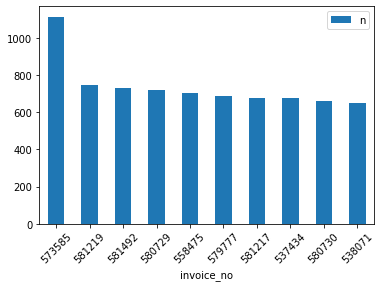

In [0]:
top_10_invoice_df.plot(kind='bar', x='invoice_no', y='n', rot=45);

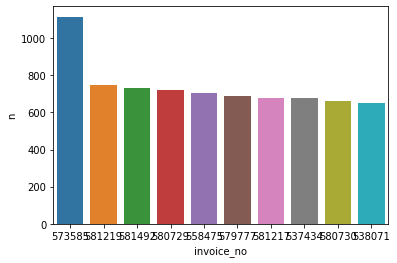

In [0]:
import seaborn as sns


sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n');

In [0]:
import matplotlib.pyplot as plt

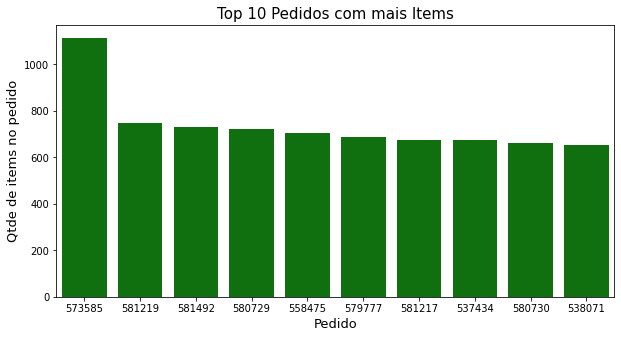

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n', ax=ax, color='green');
ax.set_ylabel('Qtde de items no pedido', fontsize=13);
ax.set_xlabel('Pedido', fontsize=13);
ax.set_title('Top 10 Pedidos com mais Items', fontsize=15);

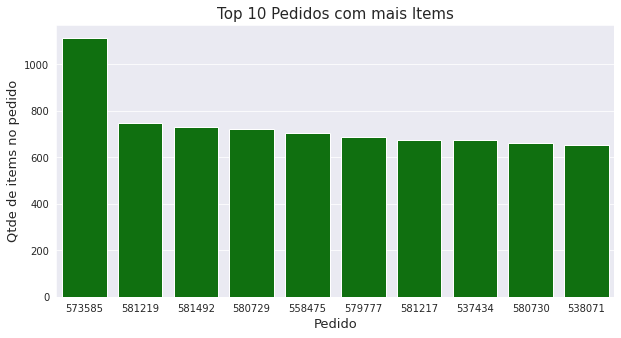

In [0]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n', ax=ax, color='green');
ax.set_ylabel('Qtde de items no pedido', fontsize=13);
ax.set_xlabel('Pedido', fontsize=13);
ax.set_title('Top 10 Pedidos com mais Items', fontsize=15);

### Vamos fazer um boxplot do preço total do pedido

valendo 0,5!

In [0]:
revenue_by_invoice_df = (
    df\
    .replace({',': '.'}, regex=True)
    .astype({'quantity':'int','unit_price':'float'})
    .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
    .groupby('invoice_no')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
)

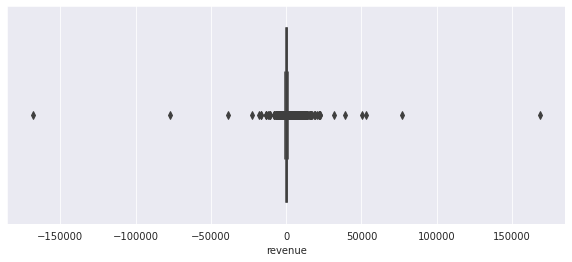

In [0]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(data=revenue_by_invoice_df, x='revenue', ax=ax);

Vamos fazer o mesmo boxplot, mas para cada mês

valendo 0,5!

In [0]:
revenue_invoice_month_df = (
    df
    .replace({',': '.'}, regex=True)
    .astype({'quantity':'int','unit_price':'float'})
    .assign(invoice_date = lambda x: pd.to_datetime(x['invoice_date']))
    .assign(month = lambda x: x['invoice_date'].dt.month)
    .assign(total_price = lambda x: x['unit_price'] * x['quantity'])
    .filter(['invoice_no', 'month', 'total_price'])
    .groupby('invoice_no')
    .agg(month = ('month', 'first'),
         revenue = ('total_price', 'sum'))
    .reset_index()
)

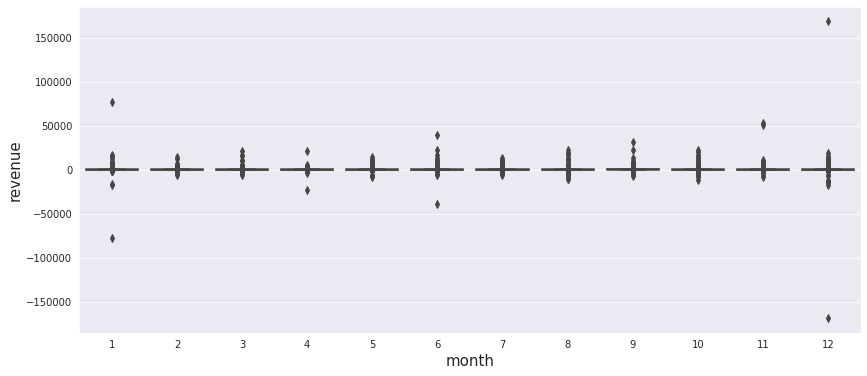

In [0]:
fig, ax = plt.subplots(figsize=(14, 6))


sns.boxplot(data=revenue_invoice_month_df, y='revenue', x='month', ax=ax);
ax.set_xlabel('month', fontsize=15);
ax.set_ylabel('revenue', fontsize=15);

# Vamos calcular a receita por país

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


In [0]:
df[['country', 'continent']] = df['region'].str.split(n=1, expand=True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.9/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3360             try:
-> 3361                 return self._engine.get_loc(casted_key)
   3362             except KeyError as err:

/databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

/databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'region'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-3

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,"(country, continent)",country,continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,United Kingdom,United,Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom,United,Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,United Kingdom,United,Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom,United,Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom,United,Kingdom


### Podemos criar uma função

In [0]:
def separate_col(data, col, into):
    df = data.copy()
    df[into] = df[col].str.split(', ', expand=True)
    return df

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom


In [0]:
df = df.drop(['country', 'continent'], axis=1)

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,"(country, continent)"
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850,United Kingdom,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850,United Kingdom,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850,United Kingdom,United Kingdom


In [0]:
#separate_col(df, col='region', into=['country', 'continent'])

In [0]:
#df.pipe(separate_col, col='region', into=['country', 'continent'])

Vamos generalizar a nossa função! Vamos incluir o argumento `sep` e `keep`.

In [0]:
def separate_col(data, col, into, sep=', ', keep=True):
    df = data.copy()
    df[into] = df[col].str.split(sep, expand=True)
    
    if keep:
        return df
    else:
        df = df.drop(col, axis=1)
        return df

In [0]:
df.pipe(separate_col, col='region', into=['country', 'continent'])

In [0]:
df.pipe(separate_col, col='region', into=['country', 'continent'], keep=False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00Z,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00Z,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00Z,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00Z,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00Z,3.39,17850.0,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09T12:50:00Z,0.85,12680.0,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09T12:50:00Z,2.10,12680.0,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09T12:50:00Z,4.15,12680.0,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09T12:50:00Z,4.15,12680.0,France,Europe


### Retorne os 10 países com as maiores receitas.

In [0]:
top10_revenue_by_country_df = (
    df
    .pipe(separate_col, col='region', into=['country', 'continent'], keep=False)
    .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
    .groupby('country')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
    .sort_values('revenue', ascending=False)
    .head(10)
)

In [0]:
top10_revenue_by_country_df

,country,revenue
36,United Kingdom,8.187806e+06
24,Netherlands,2.846615e+05
10,EIRE,2.632768e+05
14,Germany,2.216982e+05
13,France,1.974039e+05
0,Australia,1.370773e+05
33,Switzerland,5.638535e+04
31,Spain,5.477458e+04
3,Belgium,4.091096e+04
32,Sweden,3.659591e+04


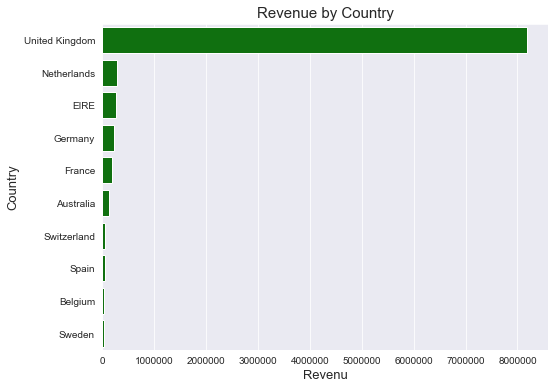

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=top10_revenue_by_country_df, y='country', x='revenue', ax=ax, color='green');
ax.set_ylabel('Country', fontsize=13);
ax.set_xlabel('Revenu', fontsize=13);
ax.set_title('Revenue by Country', fontsize=15);

### Vez de vocês! Façam o mesmo, mas para os continentes!

In [0]:
def separate_col(data, col, into, sep=', ', keep=True):
    df = data.copy()
    for i in into:
      df[i] = df[col].str.split(sep, expand=True)
    
    if keep:
        return df
    else:
        df = df.drop(col, axis=1)
        return df

In [0]:
top10_revenue_by_continent_df = (
    df
    .pipe(separate_col, col='region', into=['country', 'continent'], keep=False)
    .replace({',': '.'}, regex=True)
    .astype({'quantity':'int','unit_price':'float'})
    .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
    .groupby('continent')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
    .sort_values('revenue', ascending=False)
    .head(10)
)

In [0]:
top10_revenue_by_continent_df

,continent,revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


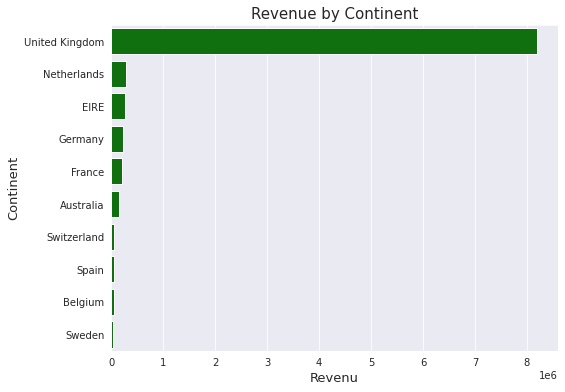

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
 
sns.barplot(data=top10_revenue_by_continent_df, y='continent', x='revenue', ax=ax, color='green');
ax.set_ylabel('Continent', fontsize=13);
ax.set_xlabel('Revenu', fontsize=13);
ax.set_title('Revenue by Continent', fontsize=15);

### Vamos calcular, para cada cliente, o seu RFV

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,start_with_c
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00Z,2.55,17850.0,"United Kingdom, Europe",False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00Z,3.39,17850.0,"United Kingdom, Europe",False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00Z,2.75,17850.0,"United Kingdom, Europe",False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00Z,3.39,17850.0,"United Kingdom, Europe",False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00Z,3.39,17850.0,"United Kingdom, Europe",False


In [0]:
from datetime import datetime, date

rfv_df = (
    df
    .assign(total_price=df['quantity'] + df['unit_price'])
    .groupby(['customer_id'])
    .agg(revenue   = ('total_price', 'sum'), 
         frequency = ('invoice_no', 'count'), 
         last_shop = ('invoice_date', 'max'))
    .reset_index()
    .assign(last_shop = lambda x: pd.to_datetime(x['last_shop'], infer_datetime_format=True))
    .assign(ref_date = datetime.strptime('2012-01-01', '%Y-%m-%d'))
    .assign(recency = lambda x: (x['ref_date'] - x['last_shop']).dt.days)
    .filter(['ref_date', 'customer_id', 'revenue', 'frequency', 'recency'])
)

In [0]:
rfv_df

,ref_date,customer_id,revenue,frequency,recency
0,2012-01-01,12346.0,74216.04,1,347
1,2012-01-01,12347.0,2939.21,182,24
2,2012-01-01,12348.0,2519.71,31,97
3,2012-01-01,12349.0,1236.10,73,40
4,2012-01-01,12350.0,262.30,17,332
...,...,...,...,...,...
4334,2012-01-01,18280.0,92.65,10,299
4335,2012-01-01,18281.0,93.36,7,202
4336,2012-01-01,18282.0,165.39,12,29
4337,2012-01-01,18283.0,2617.93,756,25
